In [1]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.18 numpy==1.16.1 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
batch_2 = anndata.read("./write/tgfb1-3-batch2.h5ad")

In [3]:
batch_per_gene = []
fc_per_gene = []
genes = []
fc_inhibitor_per_gene = []

with open("microarray_TGFb1_forMarcell.csv", "r") as f:
    current_batch = ""
    lines_skipped = 0
    
    for line in f:           
        if ">>" in line and 'all' not in line:
            line = line.split()
            current_batch = line[1]
            lines_skipped = 0
            continue
        
        if current_batch and lines_skipped < 2:
            lines_skipped += 1
            continue

        if not current_batch:
            continue
        
        line = [field for field in line.rstrip().rstrip(',').split(',')]
        
        try:
            if current_batch == "AC.only":
                gene = line[1]
                fc = float(line[5])
                genes.append(gene)
                fc_per_gene.append(fc)
                fc_inhibitor_per_gene.append(float(line[9]))
                batch_per_gene.append(current_batch)

        except:
            continue

In [4]:
len(genes)

99

In [5]:
len(batch_per_gene)

99

In [6]:
len(fc_per_gene)

99

In [7]:
fc_per_gene

[-2.28398579,
 -1.784254653,
 -1.634132107,
 -1.589508625,
 -1.561619058,
 -1.53252159,
 -1.504303963,
 -1.4817988,
 -1.480106989,
 -1.456270384,
 -1.449615425,
 -1.44223287,
 -1.441292831,
 -1.441154252,
 -1.435524881,
 -1.423354831,
 -1.408928262,
 -1.391181342,
 -1.374357492,
 -1.351582342,
 -1.34683812,
 -1.343144801,
 -1.338205123,
 -1.332324744,
 -1.317868393,
 -1.297126554,
 -1.296751152,
 -1.294010113,
 -1.289574917,
 -1.282919218,
 -1.274485621,
 -1.273301641,
 -1.271000613,
 -1.269457718,
 -1.256643101,
 -1.25217439,
 -1.24748141,
 -1.227291463,
 -1.220017619,
 -1.207746916,
 -1.203009644,
 1.194080021,
 1.19880528,
 1.199069851,
 1.206874254,
 1.209057755,
 1.209432523,
 1.215253582,
 1.21751286,
 1.21872878,
 1.224887386,
 1.225339864,
 1.229263245,
 1.230797163,
 1.240063345,
 1.24295786,
 1.243788723,
 1.253373897,
 1.263173144,
 1.265602162,
 1.270118244,
 1.280429001,
 1.293061927,
 1.300196113,
 1.30132188,
 1.302035027,
 1.304650417,
 1.337691691,
 1.349829655,
 1.350

In [8]:
fc_inhibitor_per_gene

[2.375411111,
 1.807121821,
 1.606477784,
 1.445710194,
 1.550264494,
 1.431408674,
 1.394211097,
 1.666177069,
 1.469213053,
 1.50082306,
 1.399813639,
 1.367837752,
 1.505021006,
 1.542810566,
 1.240286112,
 1.391487279,
 1.319496656,
 1.379997222,
 1.347501577,
 1.330879007,
 1.349616305,
 1.497250216,
 1.297247297,
 1.408581387,
 1.316259981,
 1.292328402,
 1.249094932,
 1.189171057,
 1.306847969,
 1.314360066,
 1.474119009,
 1.323801056,
 1.247680736,
 1.283484233,
 1.346243216,
 1.2096228,
 1.257074819,
 1.224385927,
 1.283750658,
 1.278185462,
 1.293381363,
 -1.200079847,
 -1.179167428,
 -1.216503011,
 -1.236558624,
 -1.362635867,
 -1.204875927,
 -1.205618836,
 -1.260316726,
 -1.196662515,
 -1.246370283,
 -1.262433317,
 -1.220112517,
 -1.187432537,
 -1.221115338,
 -1.225146101,
 -1.23687121,
 -1.216898426,
 -1.302633858,
 -1.323398941,
 -1.32268634,
 -1.368341133,
 -1.282557494,
 -1.311537523,
 -1.261167951,
 -1.270648126,
 -1.392386393,
 -1.237250452,
 -1.338480254,
 -1.4175384

In [9]:
list(zip(fc_per_gene, fc_inhibitor_per_gene))

[(-2.28398579, 2.375411111),
 (-1.784254653, 1.807121821),
 (-1.634132107, 1.606477784),
 (-1.589508625, 1.445710194),
 (-1.561619058, 1.550264494),
 (-1.53252159, 1.431408674),
 (-1.504303963, 1.394211097),
 (-1.4817988, 1.666177069),
 (-1.480106989, 1.469213053),
 (-1.456270384, 1.50082306),
 (-1.449615425, 1.399813639),
 (-1.44223287, 1.367837752),
 (-1.441292831, 1.505021006),
 (-1.441154252, 1.542810566),
 (-1.435524881, 1.240286112),
 (-1.423354831, 1.391487279),
 (-1.408928262, 1.319496656),
 (-1.391181342, 1.379997222),
 (-1.374357492, 1.347501577),
 (-1.351582342, 1.330879007),
 (-1.34683812, 1.349616305),
 (-1.343144801, 1.497250216),
 (-1.338205123, 1.297247297),
 (-1.332324744, 1.408581387),
 (-1.317868393, 1.316259981),
 (-1.297126554, 1.292328402),
 (-1.296751152, 1.249094932),
 (-1.294010113, 1.189171057),
 (-1.289574917, 1.306847969),
 (-1.282919218, 1.314360066),
 (-1.274485621, 1.474119009),
 (-1.273301641, 1.323801056),
 (-1.271000613, 1.247680736),
 (-1.269457718, 1

In [10]:
interesting_indices = [i for i, (left, right) in enumerate(list(zip(fc_per_gene, fc_inhibitor_per_gene))) if left > 1 and right < -1]

In [11]:
#matrix = pandas.DataFrame({"gene": genes, "batch" : batch_per_gene, "fc": fc_per_gene})

In [12]:
#interesting_genes = matrix.loc[matrix['batch'] == 'A.only']

In [13]:
#interesting_genes

In [14]:
#interesting_genes = list(interesting_genes['gene'])

In [15]:
interesting_genes = np.array(genes)[interesting_indices]

In [16]:
batch_2

AnnData object with n_obs × n_vars = 7058 × 1346 
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'cVSMC signature', 'ALK5 signature', 'ALK1 signature'
    var: 'gene_names', 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [17]:
len(interesting_genes)

58

In [18]:
common_genes = set(batch_2.var.index).intersection(set(interesting_genes))

In [19]:
len(common_genes)

5

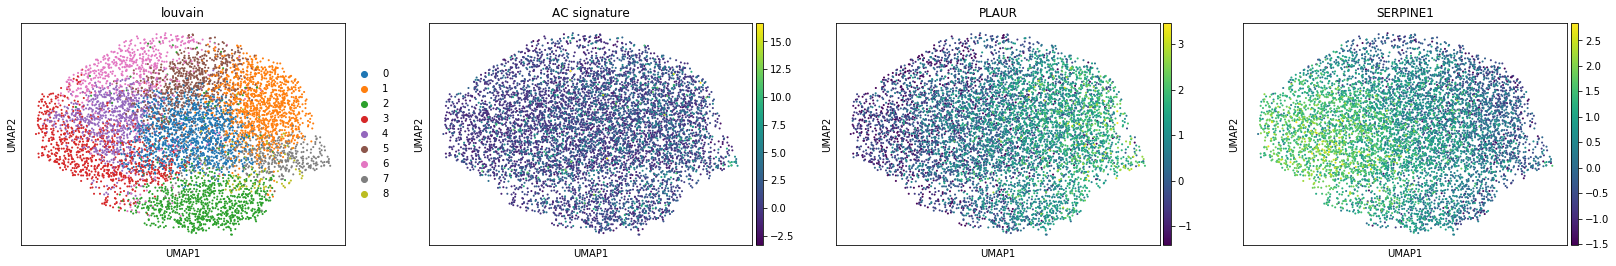

In [20]:
batch_2.obs["AC signature"] = batch_2[:,list(common_genes)].X.sum(1)
sc.pl.umap(batch_2, color=['louvain', 'AC signature', "PLAUR", "SERPINE1"])